# The Spark Foundation

## Name : Gajanan Karande

## Step 1 :  Import Library and Dataset

## Objective
* Create the decision tree classifier and visualize it graphically.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read the data in
data = pd.read_csv(r"C:\Users\gajan\Downloads\Iris (1).csv")

In [3]:
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Step 2 : Data Pre-Processing

### Univariate Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Removing Irrelavent Variable

In [6]:
data = data.drop(['Id'],axis=1)
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

### Checking Missing Value

In [7]:
# Do we have NA's in data
data.isna().sum()  ## is = check & as = convert

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
data.describe() # describe works for number by default 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Checking the Outlier

<AxesSubplot:>

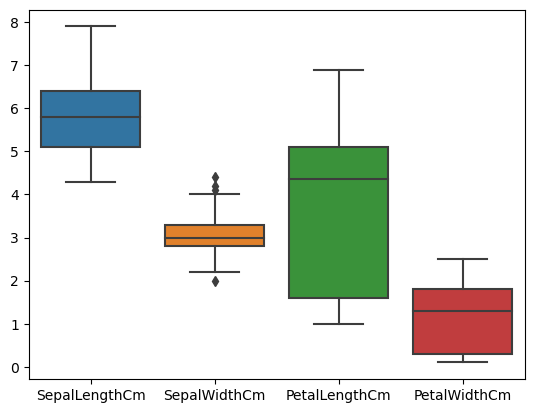

In [10]:
import seaborn as sns
sns.boxplot(data=data)

### -- Treatment of Outlier -- Winsorizing Technique

In [11]:
q1 = data['SepalWidthCm'].quantile(0.25)
q3 = data['SepalWidthCm'].quantile(0.75)
iqr = q3-q1 #Interquartile range
#low_limit = q1-1.5*iqr #acceptable range
upper_limit = q3+1.5*iqr #acceptable range
upper_limit

4.05

In [12]:
data['SepalWidthCm']=np.where(data['SepalWidthCm'] > upper_limit,upper_limit,data['SepalWidthCm']) # upper limit

In [13]:
q1 = data['SepalWidthCm'].quantile(0.25)
q3 = data['SepalWidthCm'].quantile(0.75)
iqr = q3-q1 #Interquartile range
low_limit = q1-1.5*iqr #acceptable range
#upper_limit = q3+1.5*iqr #acceptable range
low_limit

2.05

In [14]:
data['SepalWidthCm']=np.where(data['SepalWidthCm'] < low_limit,low_limit,data['SepalWidthCm']) # lower limit

<AxesSubplot:>

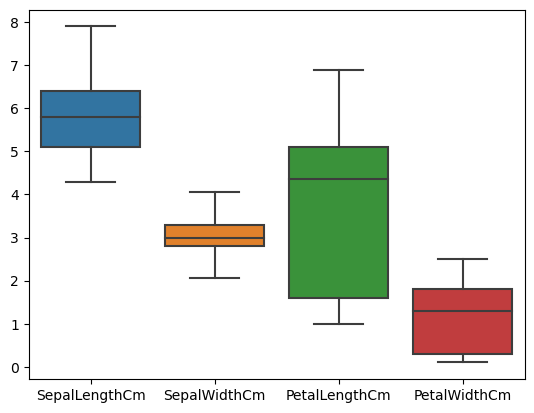

In [15]:
sns.boxplot(data=data)

### Converting Quality Variable to Number

In [20]:
from sklearn.preprocessing import LabelEncoder
data.Species=LabelEncoder().fit_transform(data.Species)
data
# label in ascending order

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


# Step 3: Data Partition

In [22]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split
#from random import seed

#seed(20)
x = data.drop(['Species'],axis=1)
y = data[['Species']]

# Train test split

X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=231)

# Step 4: Model Building

In [23]:
#Import Tree Classifier model
from sklearn import tree

dt = tree.DecisionTreeClassifier()  # by default it use Gini index for split
#Train the model using the training sets
dt.fit(X_train,y_train)  # Model = dt

DecisionTreeClassifier()

# Step 5: Plotting the Tree 

In [28]:
train=pd.concat([y_train,X_train],axis=1)
train.head()

,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
1,0,4.9,3.0,1.4,0.2
23,0,5.1,3.3,1.7,0.5
25,0,5.0,3.0,1.6,0.2
38,0,4.4,3.0,1.3,0.2
124,2,6.7,3.3,5.7,2.1


In [25]:
independent_variable = list(train.columns[1:])
independent_variable

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

# Step 6: Visualization of the Decision Tree

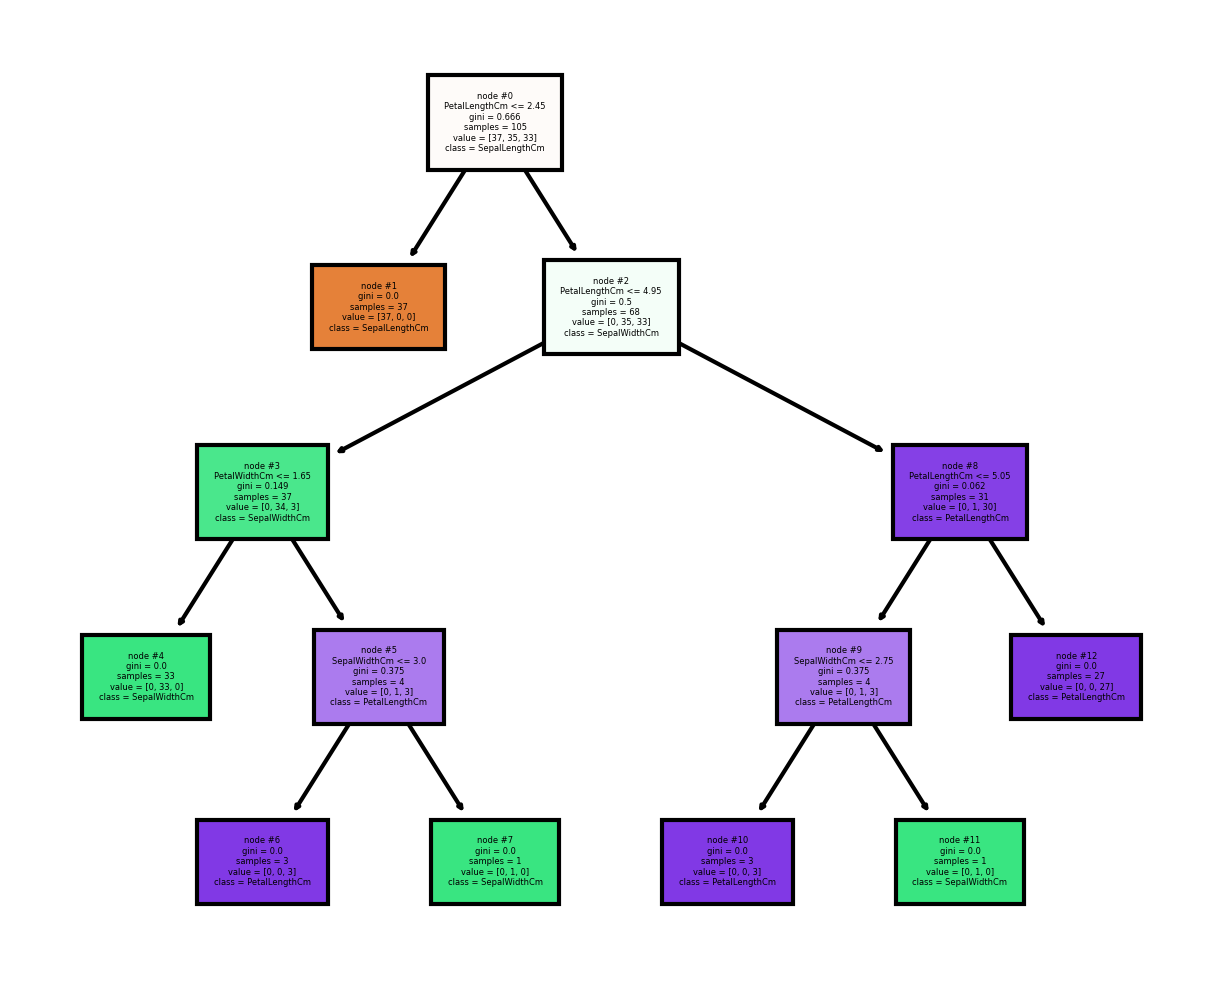

In [27]:
from sklearn import tree
import matplotlib.pyplot as plt

Species=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(dt,  # Model 
               feature_names = independent_variable,  # column name
               class_names=Species, # Yes , No
               filled = True, # colour
              node_ids=True, # node number
              fontsize=2); # 
#fig.savefig('imagename.png')

### Above figure is a decision tree classifier,If we apply data to the classifier it would be able to predict right accordingly.

## Thank You!